#Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries

In [ ]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
from sklearn.neighbors import KernelDensity
from skimage.util import random_noise
from sklearn.metrics import mean_squared_error
from skimage.filters import laplace

#Loading & Displaying Image

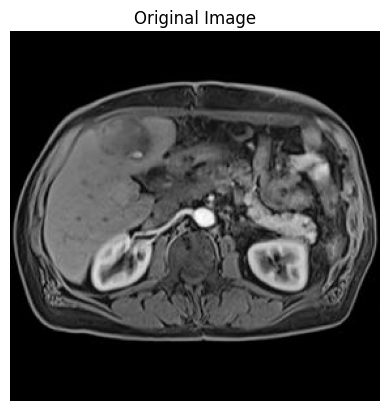

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Image Processing/liver.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

#Histogram

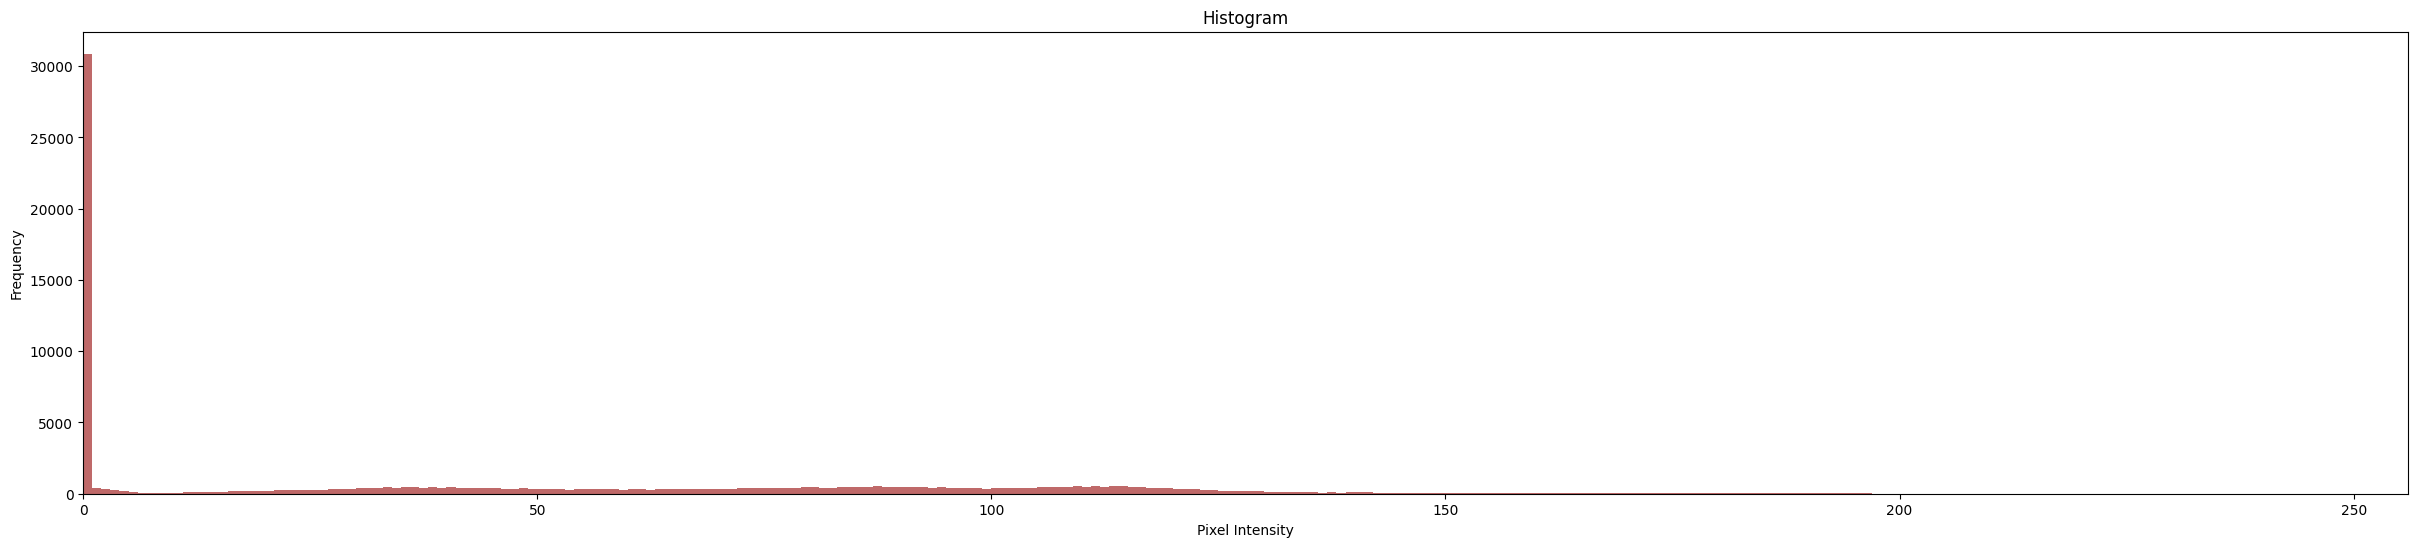

In [ ]:
histogram, bins = np.histogram(image.flatten(), 256, [0, 256])
plt.figure(figsize=(30, 6))
plt.hist(image.flatten(), bins, range=[0, 256], color='brown', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim(0, 256)
plt.ylim(0)
plt.box(True)
plt.show()

#A single Row and Column

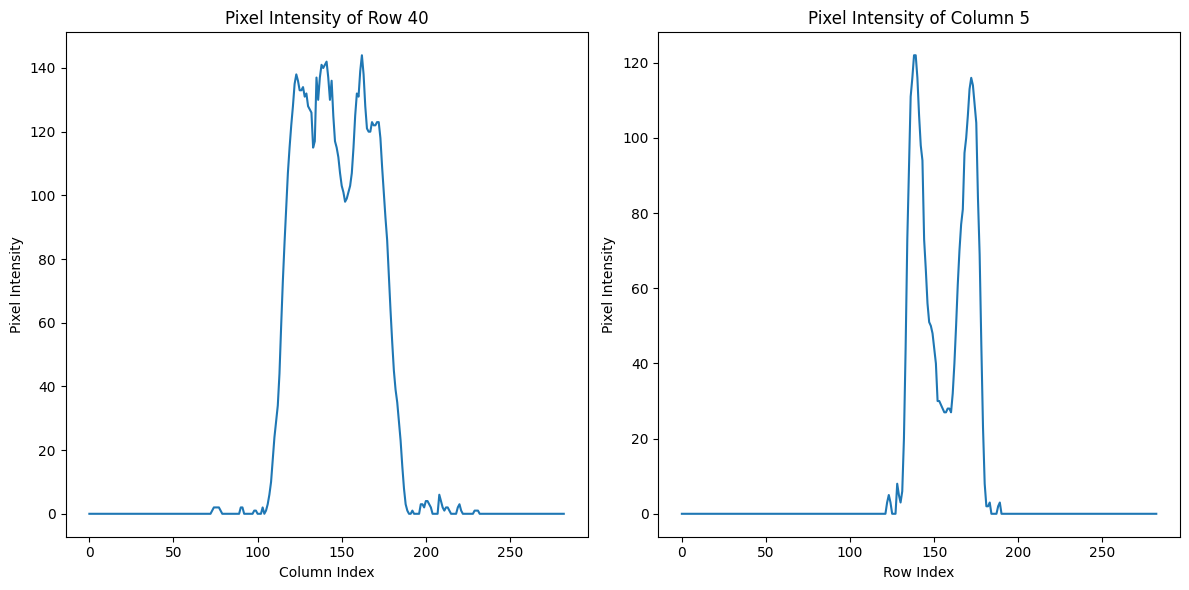

In [ ]:
# Select a row
row_index = 40
row_data = image[row_index, :]  # All columns of the 32nd row

# Select a column
column_index = 5
col_data = image[:, column_index]  # All rows of the 50th column

# Plot the row and column
plt.figure(figsize=(12, 6))

# Plot the row
plt.subplot(1, 2, 1)
plt.plot(row_data)
plt.title(f'Pixel Intensity of Row {row_index}')
plt.xlabel('Column Index')
plt.ylabel('Pixel Intensity')

# Plot the column
plt.subplot(1, 2, 2)
plt.plot(col_data)
plt.title(f'Pixel Intensity of Column {column_index}')
plt.xlabel('Row Index')
plt.ylabel('Pixel Intensity')

plt.tight_layout()
plt.show()


#Kernel Density Estimation

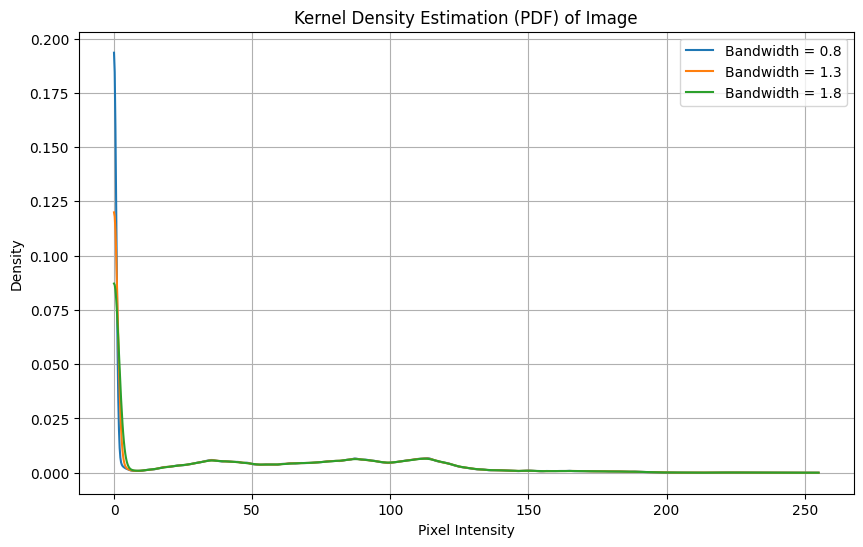

In [ ]:
# Flatten the image
pixel_values = image.flatten()

# Define Intensity Axis
x = np.linspace(0, 255, 1000)[:, np.newaxis]

# Bandwidth values
bandwidth_values = [0.8, 1.3, 1.8]

# Plot the KDE for different bandwidths
plt.figure(figsize=(10, 6))

for bandwidth in bandwidth_values:
    # Perform KDE
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(pixel_values[:, np.newaxis])  # Reshape pixel values
    log_density = kde.score_samples(x)  # Compute log density

    # Plot the PDF
    plt.plot(x, np.exp(log_density), label=f'Bandwidth = {bandwidth}')

# Plot formatting
plt.title('Kernel Density Estimation (PDF) of Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

#Average Filter

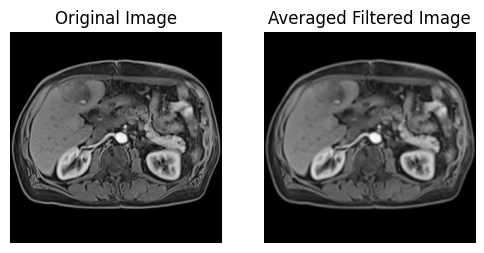

In [ ]:
# 3x3 averaging filter
kernel = np.ones((3, 3), np.float32) / 9
averaged_image = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(6, 4))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(averaged_image, cmap='gray')
plt.title('Averaged Filtered Image')
plt.axis('off')
plt.show()

#Median Filter

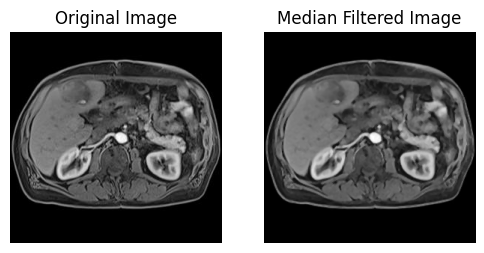

In [ ]:
# 3x3 median filter
median_filtered_image = cv2.medianBlur(image, 3)

plt.figure(figsize=(6, 4))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')
plt.show()

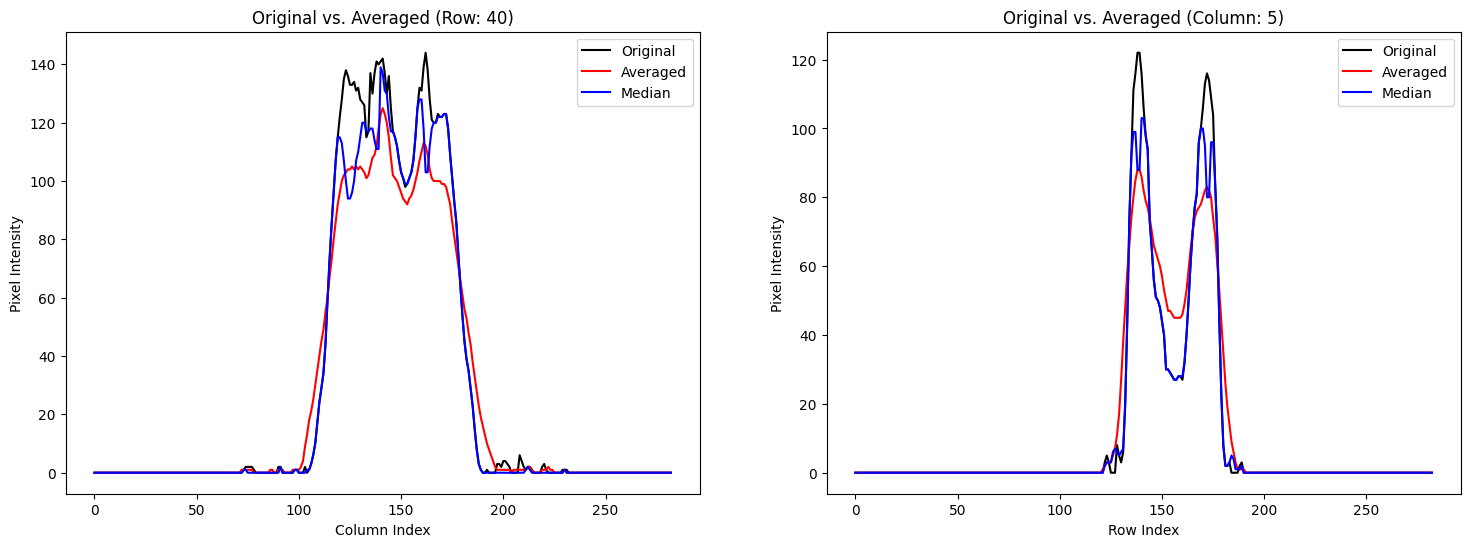

In [ ]:
# Select the row and column
row_index = 40
column_index = 5

# Row and Column Data
original_row_data = image[row_index, :]
original_col_data = image[:, column_index]

averaged_row_data = averaged_image[row_index, :]
averaged_col_data = averaged_image[:, column_index]

median_row_data = median_filtered_image[row_index, :]
median_col_data = median_filtered_image[:, column_index]

# Plot the results
plt.figure(figsize=(18, 6))

# Row Comparison
plt.subplot(1, 2, 1)
plt.plot(original_row_data, label='Original', color='black')
plt.plot(averaged_row_data, label='Averaged', color='red')
plt.plot(median_row_data, label='Median', color='blue')
plt.title('Original vs. Averaged (Row: 40)')
plt.xlabel('Column Index')
plt.ylabel('Pixel Intensity')
plt.legend()

# Column Comparison
plt.subplot(1, 2, 2)
plt.plot(original_col_data, label='Original', color='black')
plt.plot(averaged_col_data, label='Averaged', color='red')
plt.plot(median_col_data, label='Median', color='blue')
plt.title('Original vs. Averaged (Column: 5)')
plt.xlabel('Row Index')
plt.ylabel('Pixel Intensity')
plt.legend()

plt.show()


#Adding Noise

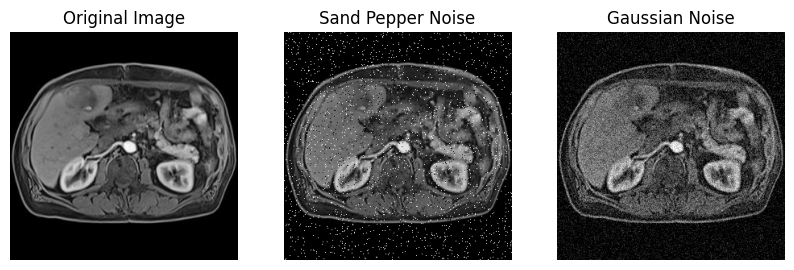

In [ ]:
# Add salt-and-pepper noise
sp_noise = random_noise(image, mode='s&p', amount=0.05)
sp_noise_image = np.array(sp_noise * 255, dtype=np.uint8)  # Convert back to 8-bit format

# Add Gaussian noise
gaussian_noise = random_noise(image, mode='gaussian', var=0.01)
gaussian_noise_image = np.array(gaussian_noise * 255, dtype=np.uint8)  # Convert back to 8-bit format

plt.figure(figsize=(10, 6))

plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(sp_noise_image, cmap='gray')
plt.title('Sand Pepper Noise')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gaussian_noise_image, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')
plt.show()

#SP Noise Filtering

MSE (Noise Effect): 1249.6698
MSE (Gaussian 3x3): 228.4473
MSE (Median 3x3): 34.6937


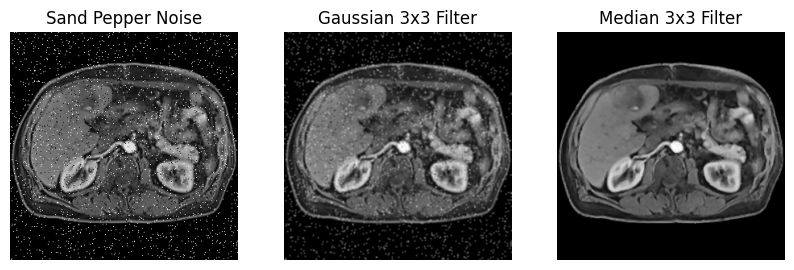

In [ ]:
#Gaussian Filter (3x3)
gaussian_3x3_sp = cv2.GaussianBlur(sp_noise_image, (3, 3), 0)

#Median Filter (3x3)
median_3x3_sp = cv2.medianBlur(sp_noise_image, 3)

print(f"MSE (Noise Effect): {mean_squared_error(image.flatten(), sp_noise_image.flatten()):.4f}")
print(f"MSE (Gaussian 3x3): {mean_squared_error(image.flatten(), gaussian_3x3_sp.flatten()):.4f}")
print(f"MSE (Median 3x3): {mean_squared_error(image.flatten(), median_3x3_sp.flatten()):.4f}")

plt.figure(figsize=(10, 6))

plt.subplot(1,3,1)
plt.imshow(sp_noise_image, cmap='gray')
plt.title('Sand Pepper Noise')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaussian_3x3_sp, cmap='gray')
plt.title('Gaussian 3x3 Filter')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(median_3x3_sp, cmap='gray')
plt.title('Median 3x3 Filter')
plt.axis('off')
plt.show()

MSE (Noise Effect): 1249.6698
MSE (Gaussian 9x9): 230.1477
MSE (Median 9x9): 327.1118


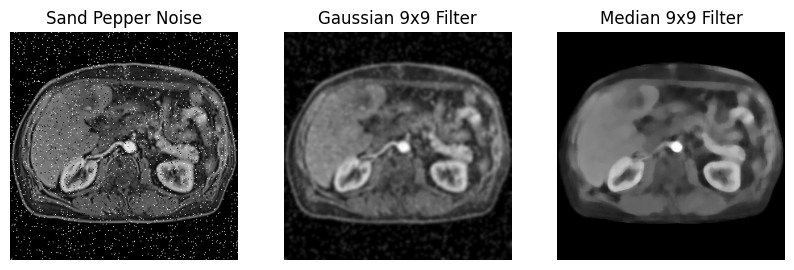

In [ ]:
# Apply Gaussian Filter (9x9)
gaussian_9x9_sp = cv2.GaussianBlur(sp_noise_image, (9, 9), 0)

# Apply Median Filter (9x9)
median_9x9_sp = cv2.medianBlur(sp_noise_image, 9)

print(f"MSE (Noise Effect): {mean_squared_error(image.flatten(), sp_noise_image.flatten()):.4f}")
print(f"MSE (Gaussian 9x9): {mean_squared_error(image.flatten(), gaussian_9x9_sp.flatten()):.4f}")
print(f"MSE (Median 9x9): {mean_squared_error(image.flatten(), median_9x9_sp.flatten()):.4f}")

plt.figure(figsize=(10, 6))

plt.subplot(1,3,1)
plt.imshow(sp_noise_image, cmap='gray')
plt.title('Sand Pepper Noise')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaussian_9x9_sp, cmap='gray')
plt.title('Gaussian 9x9 Filter')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(median_9x9_sp, cmap='gray')
plt.title('Median 9x9 Filter')
plt.axis('off')
plt.show()

MSE (Noise Effect): 1249.6698
MSE (Gaussian 15x15): 333.5950
MSE (Median 15x15): 479.7602


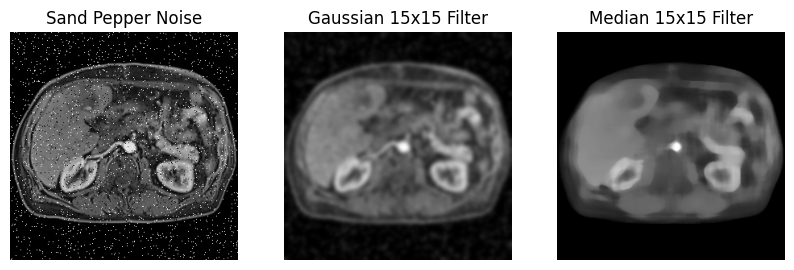

In [ ]:
# Apply Gaussian Filter (15x15)
gaussian_15x15_sp = cv2.GaussianBlur(sp_noise_image, (15, 15), 0)

# Apply Median Filter (15x15)
median_15x15_sp = cv2.medianBlur(sp_noise_image, 15)

print(f"MSE (Noise Effect): {mean_squared_error(image.flatten(), sp_noise_image.flatten()):.4f}")
print(f"MSE (Gaussian 15x15): {mean_squared_error(image.flatten(), gaussian_15x15_sp.flatten()):.4f}")
print(f"MSE (Median 15x15): {mean_squared_error(image.flatten(), median_15x15_sp.flatten()):.4f}")

plt.figure(figsize=(10, 6))

plt.subplot(1,3,1)
plt.imshow(sp_noise_image, cmap='gray')
plt.title('Sand Pepper Noise')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaussian_15x15_sp, cmap='gray')
plt.title('Gaussian 15x15 Filter')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(median_15x15_sp, cmap='gray')
plt.title('Median 15x15 Filter')
plt.axis('off')
plt.show()

#Gaussian Noise Filtering

MSE (Noise Effect): 496.4550
MSE (Gaussian 3x3): 135.7240
MSE (Median 3x3): 132.6261


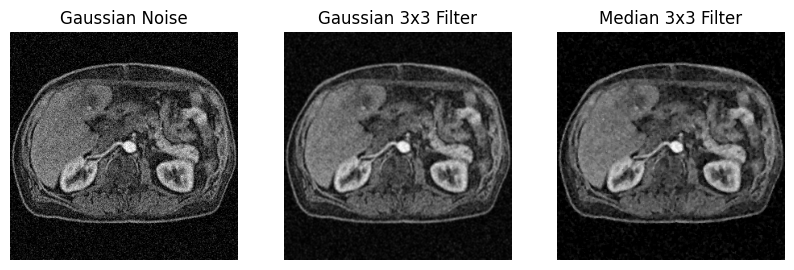

In [ ]:
# Apply Gaussian Filter (3x3)
gaussian_3x3_gn = cv2.GaussianBlur(gaussian_noise_image, (3, 3), 0)

# Apply Median Filter (3x3)
median_3x3_gn = cv2.medianBlur(gaussian_noise_image, 3)

print(f"MSE (Noise Effect): {mean_squared_error(image.flatten(), gaussian_noise_image.flatten()):.4f}")
print(f"MSE (Gaussian 3x3): {mean_squared_error(image.flatten(), gaussian_3x3_gn.flatten()):.4f}")
print(f"MSE (Median 3x3): {mean_squared_error(image.flatten(), median_3x3_gn.flatten()):.4f}")

plt.figure(figsize=(10, 6))

plt.subplot(1,3,1)
plt.imshow(gaussian_noise_image, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaussian_3x3_gn, cmap='gray')
plt.title('Gaussian 3x3 Filter')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(median_3x3_gn, cmap='gray')
plt.title('Median 3x3 Filter')
plt.axis('off')
plt.show()

MSE (Noise Effect): 496.4550
MSE (Gaussian 9x9): 223.1009
MSE (Median 9x9): 343.9466


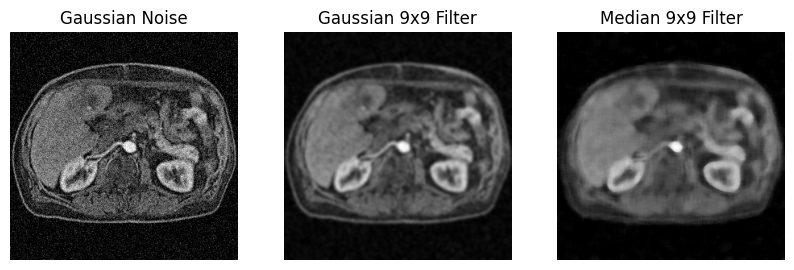

In [ ]:
# Apply Gaussian Filter (9x9)
gaussian_9x9_gn = cv2.GaussianBlur(gaussian_noise_image, (9, 9), 0)

# Apply Median Filter (9x9)
median_9x9_gn = cv2.medianBlur(gaussian_noise_image, 9)

print(f"MSE (Noise Effect): {mean_squared_error(image.flatten(), gaussian_noise_image.flatten()):.4f}")
print(f"MSE (Gaussian 9x9): {mean_squared_error(image.flatten(), gaussian_9x9_gn.flatten()):.4f}")
print(f"MSE (Median 9x9): {mean_squared_error(image.flatten(), median_9x9_gn.flatten()):.4f}")

plt.figure(figsize=(10, 6))

plt.subplot(1,3,1)
plt.imshow(gaussian_noise_image, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaussian_9x9_gn, cmap='gray')
plt.title('Gaussian 9x9 Filter')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(median_9x9_gn, cmap='gray')
plt.title('Median 9x9 Filter')
plt.axis('off')
plt.show()

MSE (Noise Effect): 496.4550
MSE (Gaussian 15x15): 338.3613
MSE (Median 15x15): 498.7219


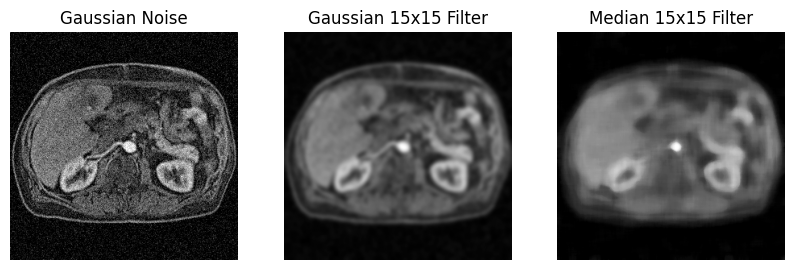

In [ ]:
# Apply Gaussian Filter (15x15)
gaussian_15x15_gn = cv2.GaussianBlur(gaussian_noise_image, (15, 15), 0)

# Apply Median Filter (15x15)
median_15x15_gn = cv2.medianBlur(gaussian_noise_image, 15)

print(f"MSE (Noise Effect): {mean_squared_error(image.flatten(), gaussian_noise_image.flatten()):.4f}")
print(f"MSE (Gaussian 15x15): {mean_squared_error(image.flatten(), gaussian_15x15_gn.flatten()):.4f}")
print(f"MSE (Median 15x15): {mean_squared_error(image.flatten(), median_15x15_gn.flatten()):.4f}")


plt.figure(figsize=(10, 6))

plt.subplot(1,3,1)
plt.imshow(gaussian_noise_image, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaussian_15x15_gn, cmap='gray')
plt.title('Gaussian 15x15 Filter')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(median_15x15_gn, cmap='gray')
plt.title('Median 15x15 Filter')
plt.axis('off')
plt.show()

#Laplacian

Sigma higher will blurr out the edges and laplace will not be able to detct the edge so there will be less enhancement and less change

In [ ]:
# Apply Gaussian Blur with varying standard deviations (sigma) and calculate MSE
def lap_of_gauss(image,sigma_value):
  # Apply Laplacian of Gaussian (LoG)
  blurred = cv2.GaussianBlur(image, (0, 0), sigma_value)
  log_image = laplace(blurred)

  # Enhance contrast by adding the LoG result to the original image
  enhanced_image = np.uint8(np.clip(image + 3 * log_image, 0, 255))
  mse = mean_squared_error(image.flatten(), enhanced_image.flatten())
  return sigma_value, enhanced_image, mse

Sigma: 1, MSE: 0.2796
Sigma: 2, MSE: 0.2611
Sigma: 3, MSE: 0.2369


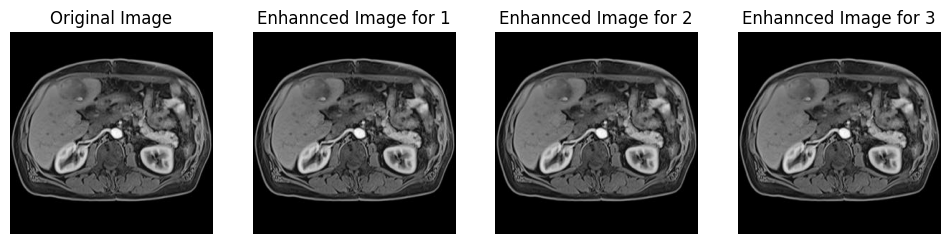

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1,4,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

S_1, E_1, M_1 = lap_of_gauss(image, 1)
S_2, E_2, M_2 = lap_of_gauss(image, 2)
S_3, E_3, M_3 = lap_of_gauss(image, 3)

print(f"Sigma: {S_1}, MSE: {M_1:.4f}")
print(f"Sigma: {S_2}, MSE: {M_2:.4f}")
print(f"Sigma: {S_3}, MSE: {M_3:.4f}")

plt.subplot(1,4,2)
plt.imshow(E_1, cmap='gray')
plt.title(f'Enhannced Image for {S_1}')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(E_2, cmap='gray')
plt.title(f'Enhannced Image for {S_2}')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(E_3, cmap='gray')
plt.title(f'Enhannced Image for {S_3}')
plt.axis('off')

plt.show()

Sigma: 1, MSE: 0.2943
Sigma: 2, MSE: 0.2601
Sigma: 3, MSE: 0.2351


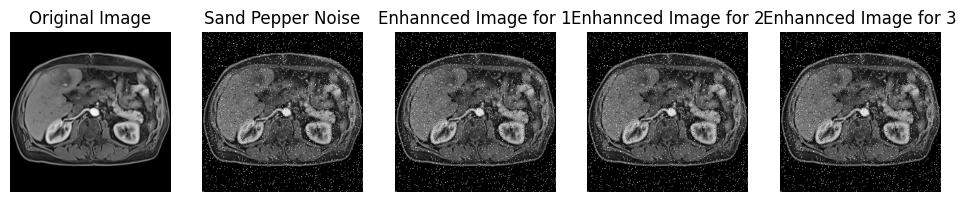

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1,5,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(sp_noise_image, cmap='gray')
plt.title('Sand Pepper Noise')
plt.axis('off')

S_1, E_1, M_1 = lap_of_gauss(sp_noise_image, 1)
S_2, E_2, M_2 = lap_of_gauss(sp_noise_image, 2)
S_3, E_3, M_3 = lap_of_gauss(sp_noise_image, 3)

print(f"Sigma: {S_1}, MSE: {M_1:.4f}")
print(f"Sigma: {S_2}, MSE: {M_2:.4f}")
print(f"Sigma: {S_3}, MSE: {M_3:.4f}")

plt.subplot(1,5,3)
plt.imshow(E_1, cmap='gray')
plt.title(f'Enhannced Image for {S_1}')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(E_2, cmap='gray')
plt.title(f'Enhannced Image for {S_2}')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(E_3, cmap='gray')
plt.title(f'Enhannced Image for {S_3}')
plt.axis('off')

plt.show()

Sigma: 1, MSE: 0.3304
Sigma: 2, MSE: 0.3107
Sigma: 3, MSE: 0.2869


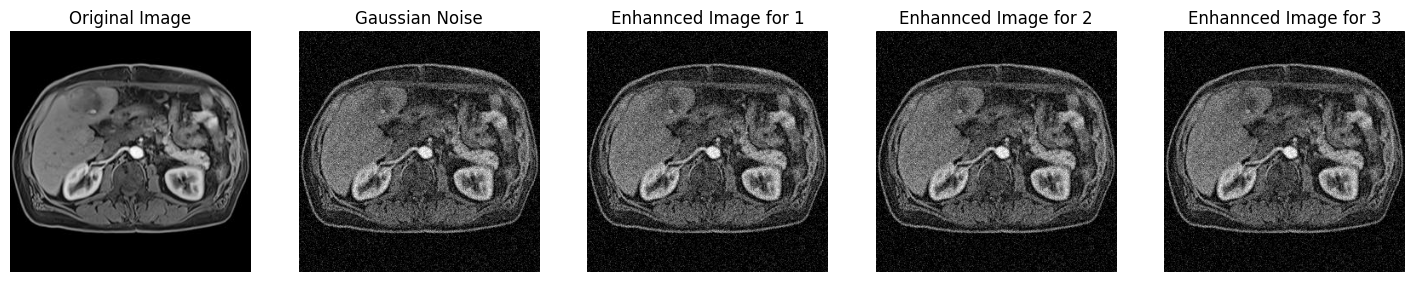

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1,5,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(gaussian_noise_image, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')

S_1, E_1, M_1 = lap_of_gauss(gaussian_noise_image, 1)
S_2, E_2, M_2 = lap_of_gauss(gaussian_noise_image, 2)
S_3, E_3, M_3 = lap_of_gauss(gaussian_noise_image, 3)

print(f"Sigma: {S_1}, MSE: {M_1:.4f}")
print(f"Sigma: {S_2}, MSE: {M_2:.4f}")
print(f"Sigma: {S_3}, MSE: {M_3:.4f}")

plt.subplot(1,5,3)
plt.imshow(E_1, cmap='gray')
plt.title(f'Enhannced Image for {S_1}')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(E_2, cmap='gray')
plt.title(f'Enhannced Image for {S_2}')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(E_3, cmap='gray')
plt.title(f'Enhannced Image for {S_3}')
plt.axis('off')

plt.show()

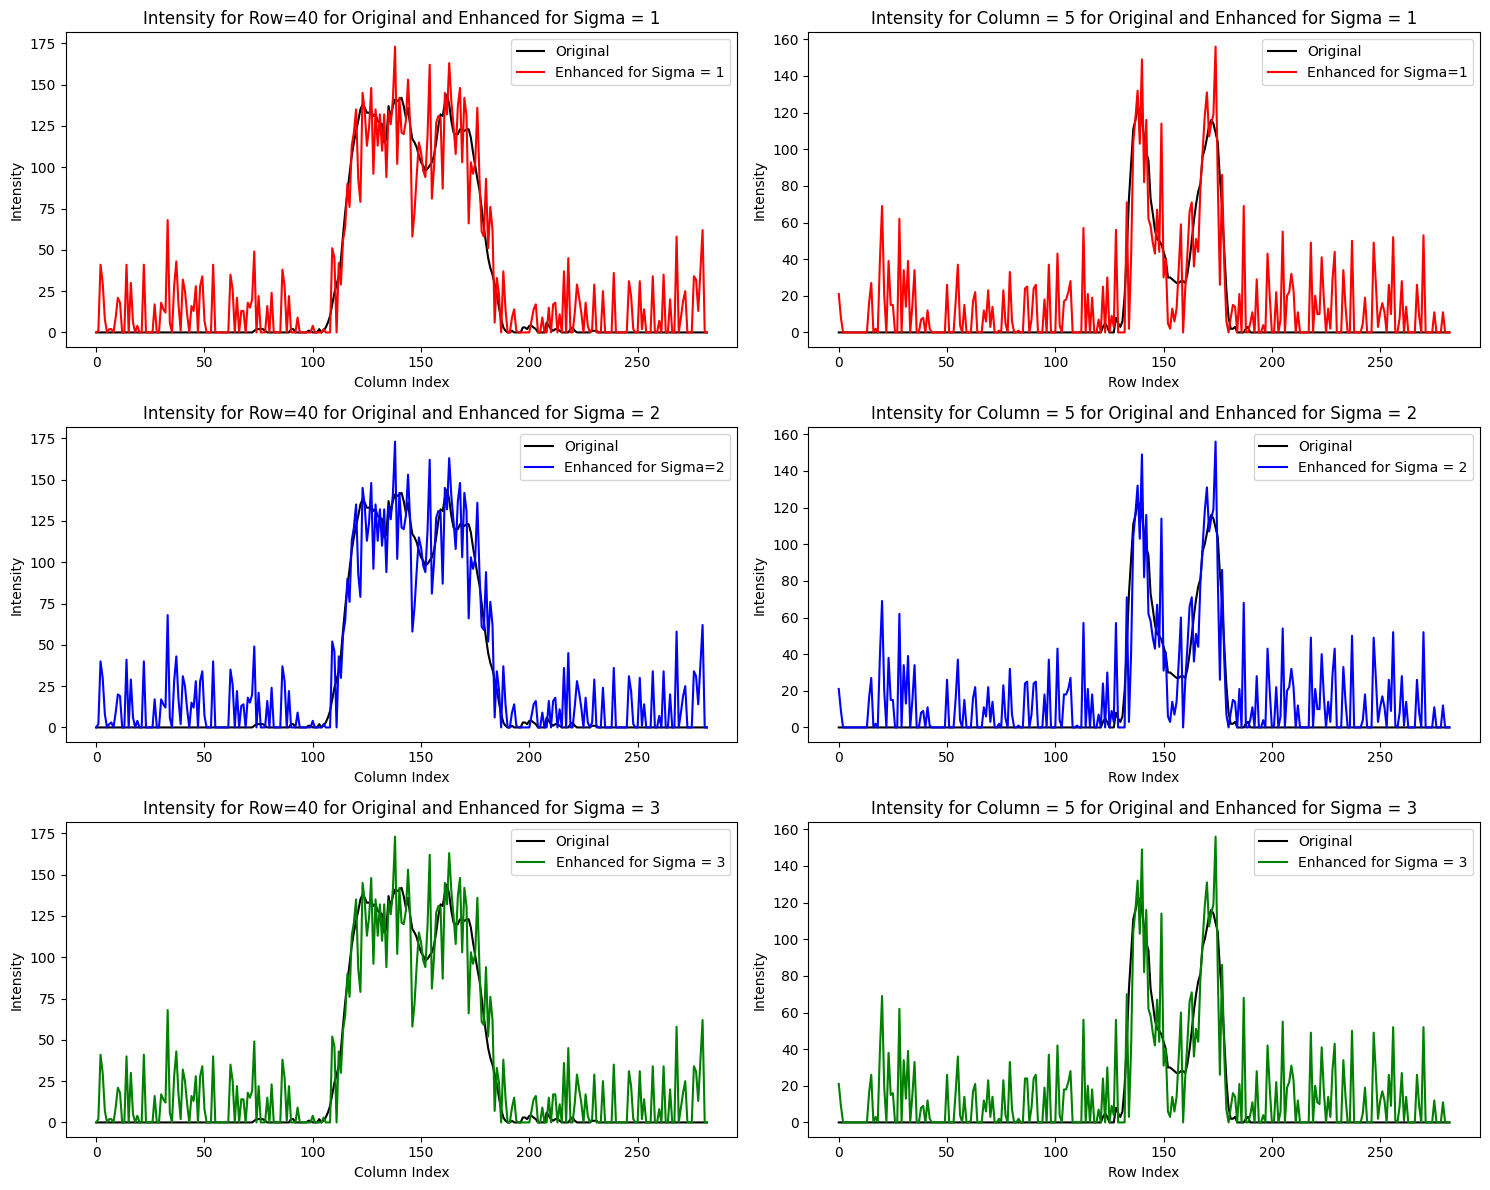

In [ ]:
plt.figure(figsize=(15, 12))

# Extract and Superimpose Row and Column Intensity Profiles
row = 40
col = 5

# Original Intensity Profiles
original_row = image[row, :]
original_col = image[:, col]

# Enhanced Intensity Profiles
enhanced_row_1 = E_1[row, :]
enhanced_col_1 = E_1[:, col]

enhanced_row_2 = E_2[row, :]
enhanced_col_2 = E_2[:, col]

enhanced_row_3 = E_3[row, :]
enhanced_col_3 = E_3[:, col]

# Plot for Enhanced 1
plt.subplot(3, 2, 1)
plt.plot(original_row, label='Original', color='black')
plt.plot(enhanced_row_1, label='Enhanced for Sigma = 1', color='red')
plt.title('Intensity for Row=40 for Original and Enhanced for Sigma = 1')
plt.xlabel('Column Index')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(original_col, label='Original', color='black')
plt.plot(enhanced_col_1, label='Enhanced for Sigma=1', color='red')
plt.title('Intensity for Column = 5 for Original and Enhanced for Sigma = 1')
plt.xlabel('Row Index')
plt.ylabel('Intensity')
plt.legend()

# Plot for Enhanced 2
plt.subplot(3, 2, 3)
plt.plot(original_row, label='Original', color='black')
plt.plot(enhanced_row_2, label='Enhanced for Sigma=2', color='blue')
plt.title('Intensity for Row=40 for Original and Enhanced for Sigma = 2')
plt.xlabel('Column Index')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(original_col, label='Original', color='black')
plt.plot(enhanced_col_2, label='Enhanced for Sigma = 2', color='blue')
plt.title('Intensity for Column = 5 for Original and Enhanced for Sigma = 2')
plt.xlabel('Row Index')
plt.ylabel('Intensity')
plt.legend()

# Plot for Enhanced 3
plt.subplot(3, 2, 5)
plt.plot(original_row, label='Original', color='black')
plt.plot(enhanced_row_3, label='Enhanced for Sigma = 3', color='green')
plt.title('Intensity for Row=40 for Original and Enhanced for Sigma = 3')
plt.xlabel('Column Index')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(original_col, label='Original', color='black')
plt.plot(enhanced_col_3, label='Enhanced for Sigma = 3', color='green')
plt.title('Intensity for Column = 5 for Original and Enhanced for Sigma = 3')
plt.xlabel('Row Index')
plt.ylabel('Intensity')
plt.legend()

plt.tight_layout()
plt.show()


#Histogram Equalization

In [ ]:
# Histogram
histogram_image = cv2.imread('/content/drive/MyDrive/Image Processing/X-ray.jpg', cv2.IMREAD_GRAYSCALE)
histogram, bins = np.histogram(histogram_image.flatten(), 256, [0, 256])

# Compute the CDF
cdf = histogram.cumsum()
cdf_normalized=[]
'''
# Normalize the CDF
cdf_normalized = (cdf / cdf[-1]) * 255
cdf_normalized = [round(value) for value in cdf_normalized]
'''
# Normalize the CDF
cdf_normalized = (cdf - cdf.min()) / (cdf.max() - cdf.min()) * 255
cdf_normalized = np.round(cdf_normalized).astype('uint8')

# Map the original image
equalized_image = cdf_normalized[histogram_image.flatten()].reshape(histogram_image.shape)


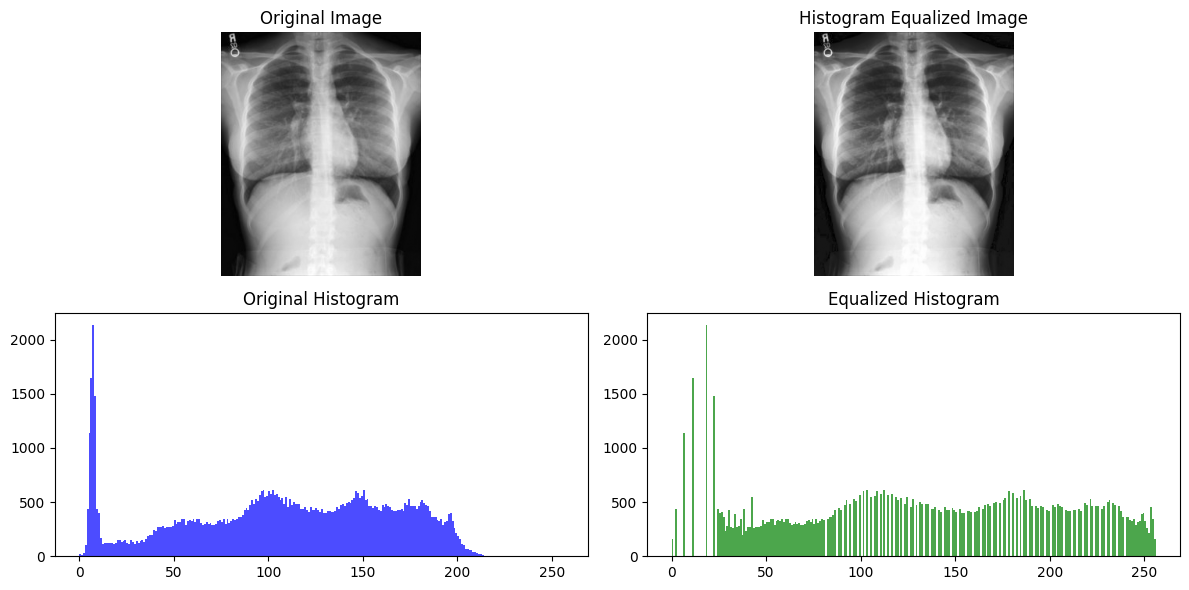

In [ ]:
# Plot the Result
plt.figure(figsize=(12, 6))

#Plot the Image
plt.subplot(2,2,1)
plt.imshow(histogram_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

# Original histogram
plt.subplot(2, 2, 3)
plt.hist(histogram_image.flatten(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title('Original Histogram')

# Equalized histogram
plt.subplot(2, 2, 4)
plt.hist(equalized_image.flatten(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()

#Frequency Domain Filtering

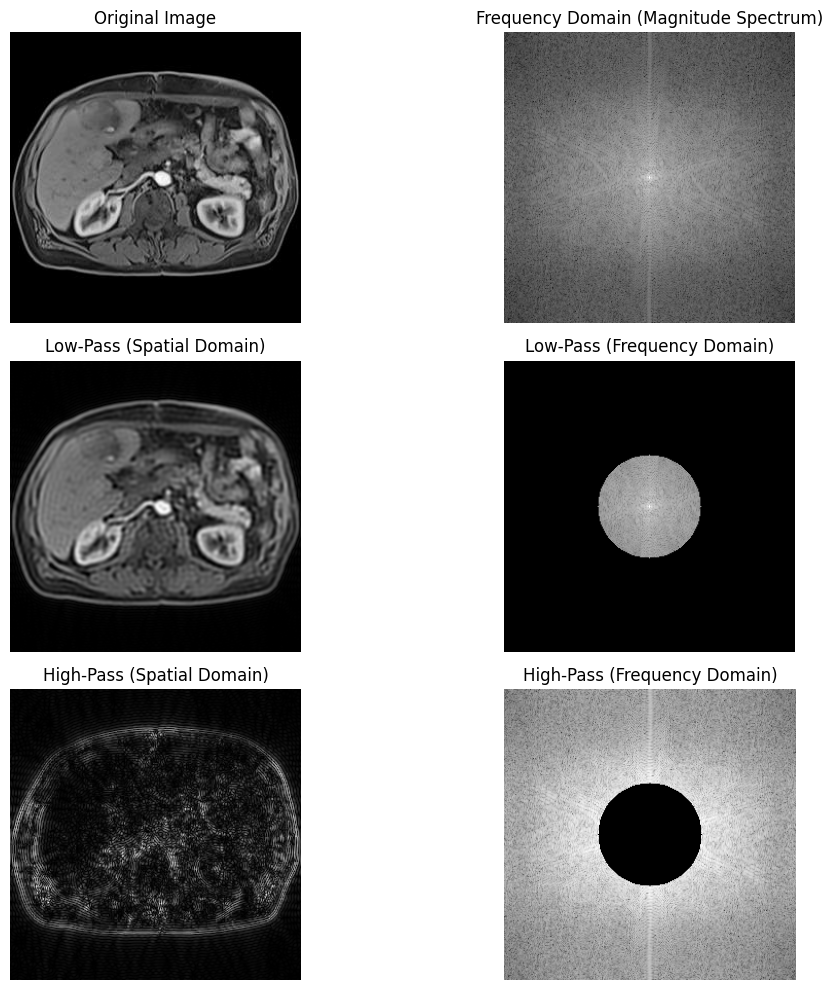

In [ ]:
#FT
f_transform = np.fft.fft2(image)  #2D FT
f_shift = np.fft.fftshift(f_transform)  #Center
magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)  #Log-scale

#LPF
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  #Center
low_pass_mask = np.zeros((rows, cols), np.uint8)
low_pass_mask = cv2.circle(low_pass_mask, (ccol, crow), 50, 1, thickness=-1)  #Circular mask
low_pass_freq = f_shift * low_pass_mask  #Low-pass mask
low_pass_img = np.fft.ifft2(np.fft.ifftshift(low_pass_freq))  #Inverse FFT
low_pass_img = np.abs(low_pass_img)

#HPF
high_pass_mask = 1 - low_pass_mask  #Mask for high-pass
high_pass_freq = f_shift * high_pass_mask  #High-pass mask
high_pass_img = np.fft.ifft2(np.fft.ifftshift(high_pass_freq))  #Inverse FFT
high_pass_img = np.abs(high_pass_img)

#Plot
plt.figure(figsize=(12, 10))

#Original
plt.subplot(3, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

#Frequency Domain
plt.subplot(3, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Domain (Magnitude Spectrum)')
plt.axis('off')

#LPF - SD
plt.subplot(3, 2, 3)
plt.imshow(low_pass_img, cmap='gray')
plt.title('Low-Pass (Spatial Domain)')
plt.axis('off')

#LPF - FD
plt.subplot(3, 2, 4)
plt.imshow(20 * np.log(np.abs(low_pass_freq) + 1), cmap='gray')
plt.title('Low-Pass (Frequency Domain)')
plt.axis('off')

#HPF - SD
plt.subplot(3, 2, 5)
plt.imshow(high_pass_img, cmap='gray')
plt.title('High-Pass (Spatial Domain)')
plt.axis('off')

#HPF - FD
plt.subplot(3, 2, 6)
plt.imshow(20 * np.log(np.abs(high_pass_freq) + 1), cmap='gray')
plt.title('High-Pass (Frequency Domain)')
plt.axis('off')

plt.tight_layout()
plt.show()

#Edge Detection

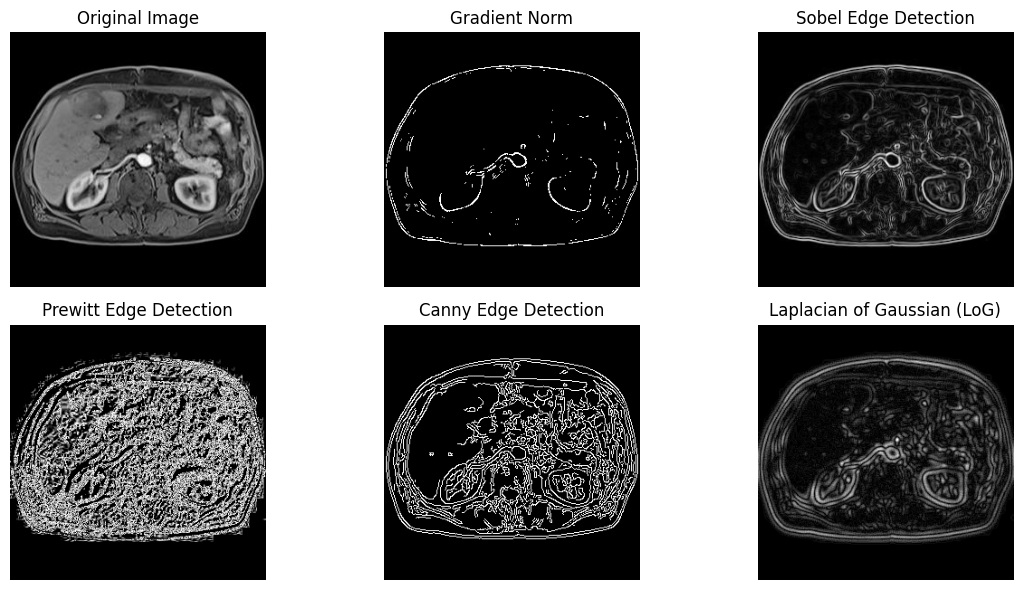

In [ ]:
#Image Gradient
kernel_x = np.array([[0, 0, 0], [1, 0, -1], [0, 0, 0]])  #gradient_kernel_x
kernel_y = np.array([[0, 1, 0], [0, 0, 0], [0, -1, 0]])  #gradient_kernel_y
gradient_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)  #gradient_x
gradient_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)  #gradient_y
gradient_norm = np.sqrt(gradient_x**2 + gradient_y**2)
threshold = 100  #threshold
edge_map = (gradient_norm > threshold).astype(np.uint8)  #binary image

#Sobel Edge Detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  #gradient_x
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  #gradient_y
sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)  #gradient magnitude

#Prewitt Edge Detection
kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  #Prewitt kernel for X
kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  #Prewitt kernel for Y
prewitt_x = cv2.filter2D(image, -1, kernel_x)  #Prewitt X gradient
prewitt_y = cv2.filter2D(image, -1, kernel_y)  #Prewitt Y gradient
prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2).astype(np.uint8)

#Canny Edge Detection
canny_edges = cv2.Canny(image, 50, 150)

#Laplacian of Gaussian (LoG)
blurred = cv2.GaussianBlur(image, (0, 0), 2)
laplacian = cv2.Laplacian(blurred, cv2.CV_64F, ksize=3)
laplacian_edges = np.uint8(np.abs(laplacian))


plt.figure(figsize=(12, 6))

#Original Image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

#Gradient Norm
plt.subplot(2, 3, 2)
plt.imshow(edge_map, cmap='gray')
plt.title('Gradient Norm')
plt.axis('off')

#Sobel Edge Detection
plt.subplot(2, 3, 3)
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

#Prewitt Edge Detection
plt.subplot(2, 3, 4)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

#Canny Edge Detection
plt.subplot(2, 3, 5)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

#Laplacian of Gaussian
plt.subplot(2, 3, 6)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian of Gaussian (LoG)')
plt.axis('off')

plt.tight_layout()
plt.show()

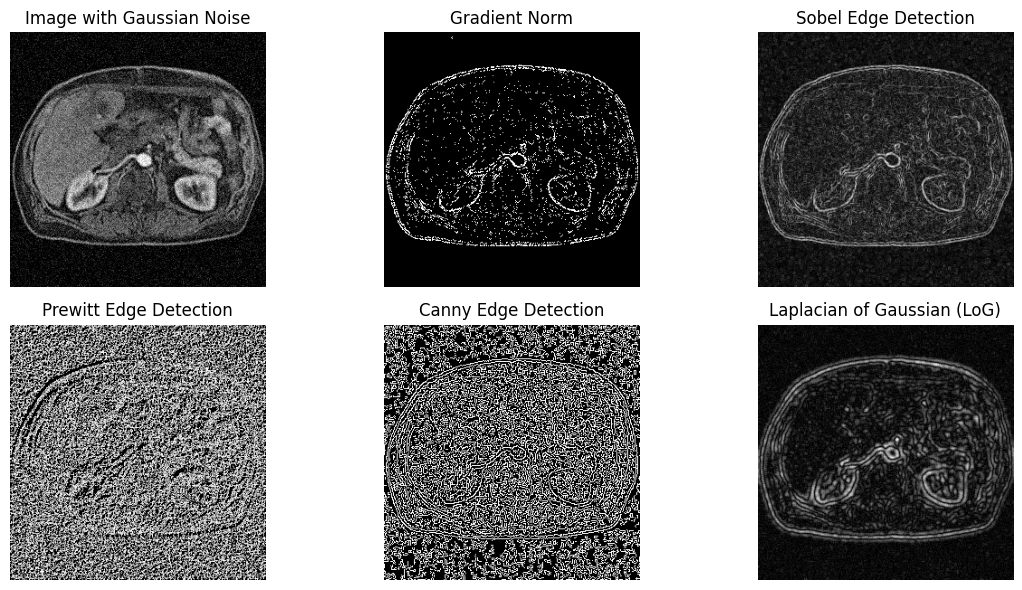

In [ ]:
#Image Gradient
kernel_x = np.array([[0, 0, 0], [1, 0, -1], [0, 0, 0]])  #gradient_kernel_x
kernel_y = np.array([[0, 1, 0], [0, 0, 0], [0, -1, 0]])  #gradient_kernel_y
gradient_x = cv2.filter2D(gaussian_noise_image, cv2.CV_64F, kernel_x)  #gradient_x
gradient_y = cv2.filter2D(gaussian_noise_image, cv2.CV_64F, kernel_y)  #gradient_y
gradient_norm = np.sqrt(gradient_x**2 + gradient_y**2)
threshold = 100  #threshold
edge_map = (gradient_norm > threshold).astype(np.uint8)  #binary image

#Sobel Edge Detection
sobel_x = cv2.Sobel(gaussian_noise_image, cv2.CV_64F, 1, 0, ksize=3)  #gradient_x
sobel_y = cv2.Sobel(gaussian_noise_image, cv2.CV_64F, 0, 1, ksize=3)  #gradient_y
sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)  #gradient magnitude

#Prewitt Edge Detection
kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  #Prewitt kernel for X
kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])  #Prewitt kernel for Y
prewitt_x = cv2.filter2D(gaussian_noise_image, -1, kernel_x)  #Prewitt X gradient
prewitt_y = cv2.filter2D(gaussian_noise_image, -1, kernel_y)  #Prewitt Y gradient
prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2).astype(np.uint8)

#Canny Edge Detection
canny_edges = cv2.Canny(gaussian_noise_image, 50, 150)

#Laplacian of Gaussian (LoG)
blurred = cv2.GaussianBlur(gaussian_noise_image, (0, 0), 2)
laplacian = cv2.Laplacian(blurred, cv2.CV_64F, ksize=3)
laplacian_edges = np.uint8(np.abs(laplacian))


plt.figure(figsize=(12, 6))

#Image with Gaussian Noise
plt.subplot(2, 3, 1)
plt.imshow(gaussian_noise_image, cmap='gray')
plt.title('Image with Gaussian Noise')
plt.axis('off')

#Gradient Norm
plt.subplot(2, 3, 2)
plt.imshow(edge_map , cmap='gray')
plt.title('Gradient Norm')
plt.axis('off')

#Sobel Edge Detection
plt.subplot(2, 3, 3)
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

#Prewitt Edge Detection
plt.subplot(2, 3, 4)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

#Canny Edge Detection
plt.subplot(2, 3, 5)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

#Laplacian of Gaussian
plt.subplot(2, 3, 6)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian of Gaussian (LoG)')
plt.axis('off')

plt.tight_layout()
plt.show()